# Queries for Valence research
## Getting TF ready

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [9]:
A = use('bhsa', hoist=globals())

	connecting to online GitHub repo annotation/app-bhsa ... failed
GitHub says: 403 {'message': "API rate limit exceeded for 93.229.46.177. (But here's the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)", 'documentation_url': 'https://developer.github.com/v3/#rate-limiting'}
The offline TF-app may not be the latest
Using TF-app in C:\Users\Oliver Glanz/text-fabric-data/annotation/app-bhsa/code:
	rv1.2=#5fdf1778d51d938bfe80b37b415e36618e50190c (latest? release)
	connecting to online GitHub repo etcbc/bhsa ... failed
GitHub says: 403 {'message': "API rate limit exceeded for 93.229.46.177. (But here's the good news: Authenticated requests get a higher rate limit. Check out the documentation for more details.)", 'documentation_url': 'https://developer.github.com/v3/#rate-limiting'}
The offline data may not be the latest
Using data in C:\Users\Oliver Glanz/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6 (latest? release)
	connecting to onlin

## Valence of Fear
As an example will be looking at the verb ירא and inquire its dominant valencies.

HALOT shows the following entry for (<a target="_blank" href="https://ref.ly/logosres/hal?hw=%D7%99%D7%A8%D7%90">ירא</a>):

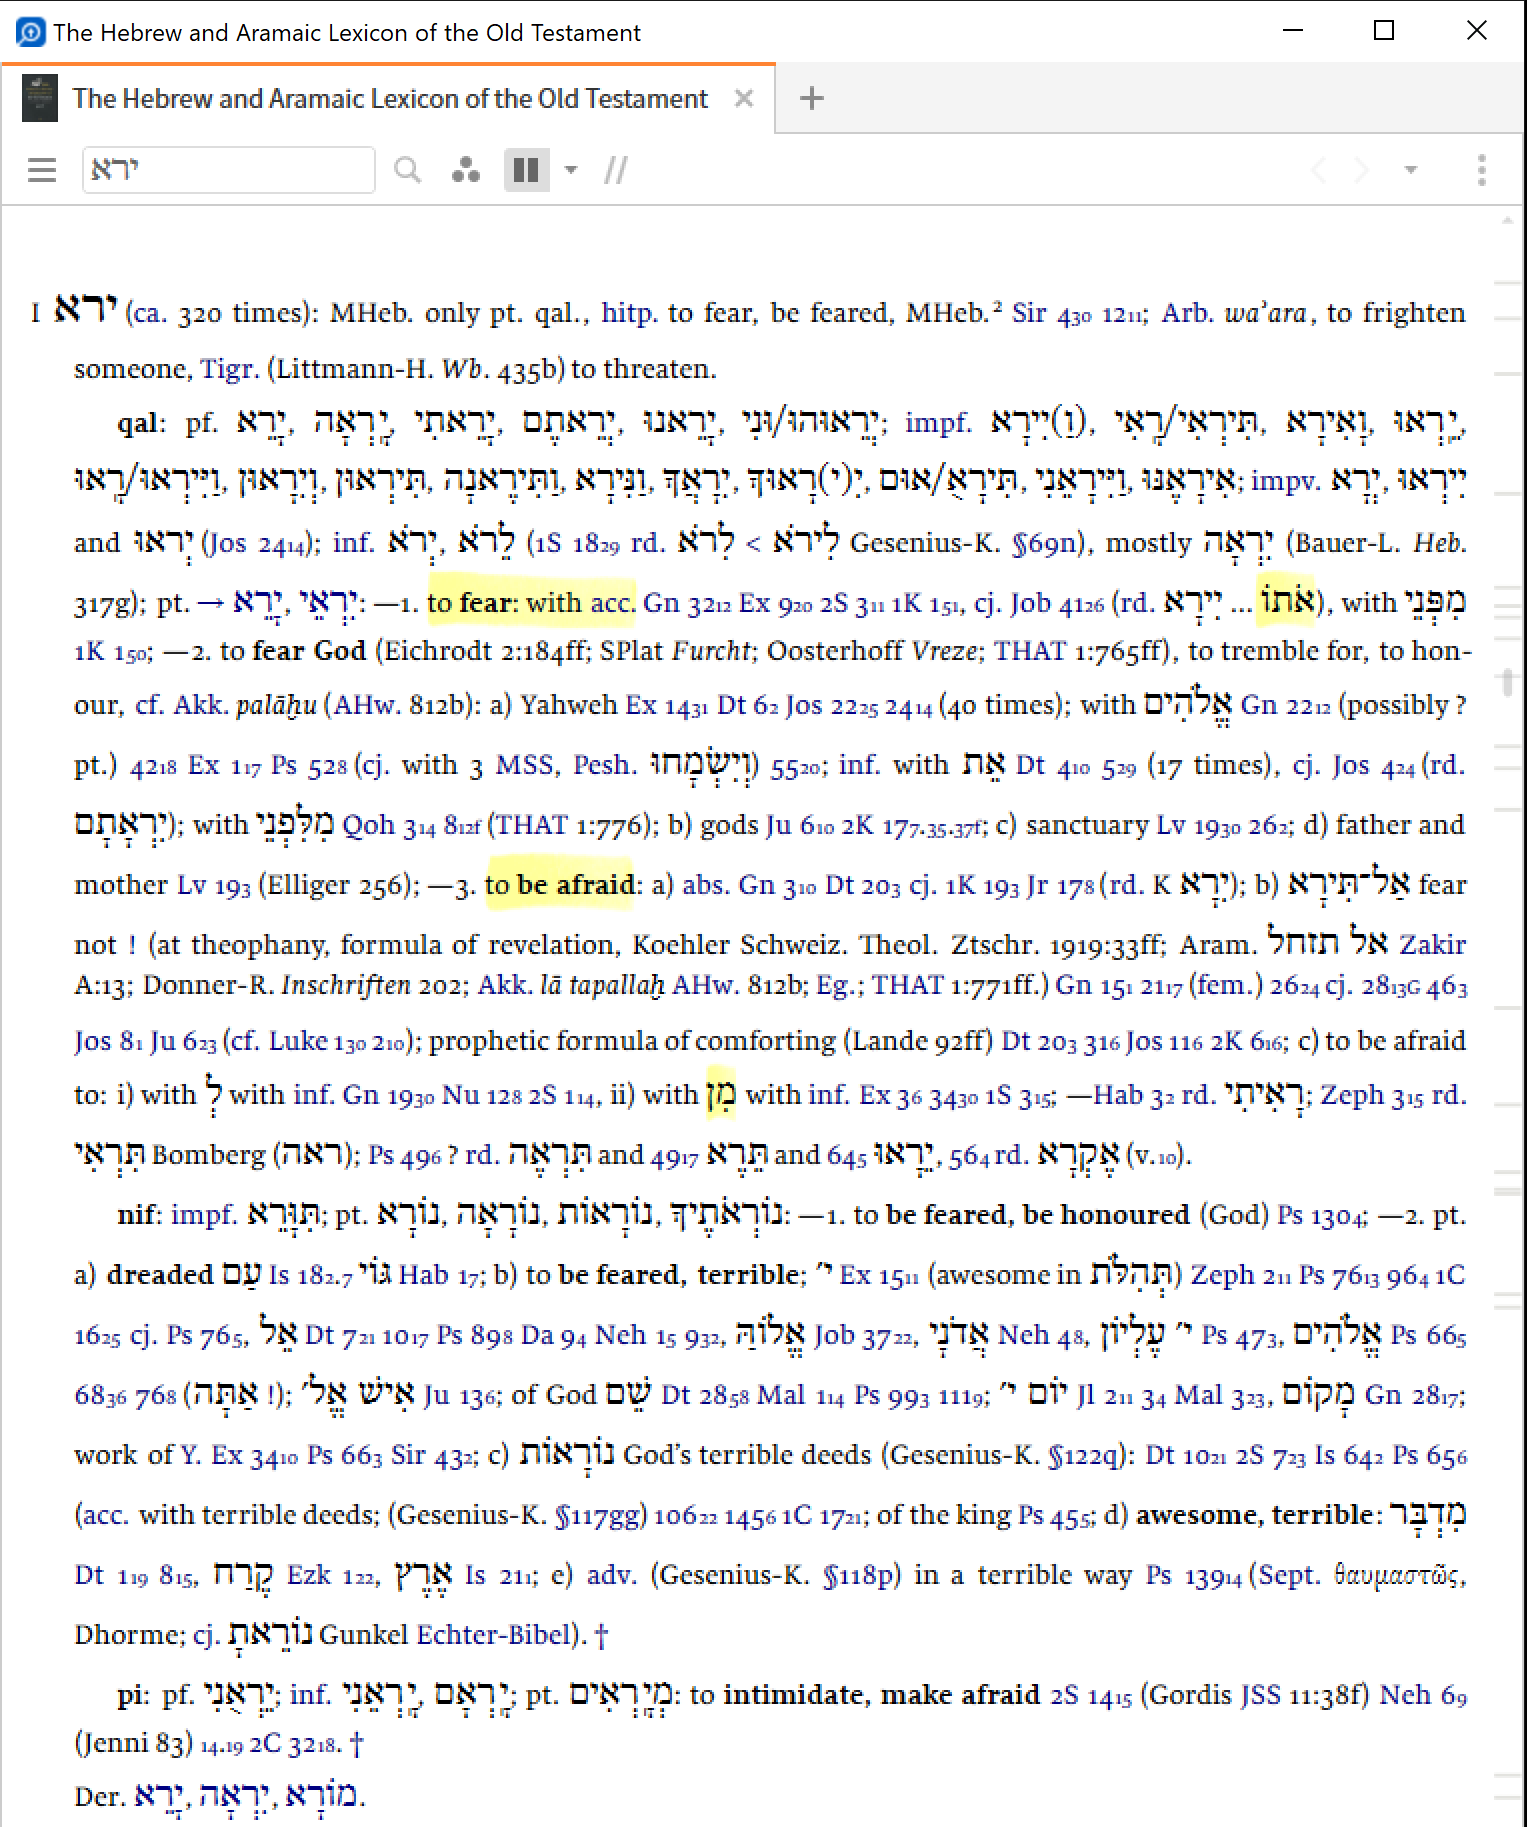

Obviously ירא can have two different meanings ([a] to be afraid of; [b] to have reverence for). But which meaning is active in a certain context? This answer can hopefully be provided by the valencies of the word ירא.

Thus, we wil be looking for ירא and its complement phrases, i.e. necessary elements for ירא to have a particular meaning.

In [10]:
FearVal1 = '''
clause
    phrase function=Pred
        word lex=JR>[
    phrase function=Cmpl|Objc
'''
FearVal1  = A.search(FearVal1)
A.table(FearVal1, start=1, end=3, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 4:'magenta'})

  0.99s 134 results


n,p,clause,phrase,word,phrase
1,Exodus 1:17,וַתִּירֶ֤אןָ הַֽמְיַלְּדֹת֙ אֶת־הָ֣אֱלֹהִ֔ים,תִּירֶ֤אןָ,תִּירֶ֤אןָ,אֶת־הָ֣אֱלֹהִ֔ים
2,Exodus 1:21,כִּֽי־יָֽרְא֥וּ הַֽמְיַלְּדֹ֖ת אֶת־הָאֱלֹהִ֑ים,יָֽרְא֥וּ,יָֽרְא֥וּ,אֶת־הָאֱלֹהִ֑ים
3,Exodus 9:30,כִּ֚י טֶ֣רֶם תִּֽירְא֔וּן מִפְּנֵ֖י יְהוָ֥ה אֱלֹהִֽים׃,תִּֽירְא֔וּן,תִּֽירְא֔וּן,מִפְּנֵ֖י יְהוָ֥ה אֱלֹהִֽים׃


Interestingly, but perhaps not surprising, we are finding JHWH|>LHJM in the complement position. So lets further specify the query and just search for complement phrases that have the divine name contained.

In [11]:
FearVal2 = '''
clause
    phrase function=Pred
        word lex=JR>[
    phrase function=Cmpl|Objc
        word lex=JHWH/|>L/|>LHJM/
'''
FearVal2  = A.search(FearVal2)
A.table(FearVal2, start=1, end=5, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 4:'magenta'})

  1.65s 65 results


n,p,clause,phrase,word,phrase,word
1,Exodus 1:17,וַתִּירֶ֤אןָ הַֽמְיַלְּדֹת֙ אֶת־הָ֣אֱלֹהִ֔ים,תִּירֶ֤אןָ,תִּירֶ֤אןָ,אֶת־הָ֣אֱלֹהִ֔ים,אֱלֹהִ֔ים
2,Exodus 1:21,כִּֽי־יָֽרְא֥וּ הַֽמְיַלְּדֹ֖ת אֶת־הָאֱלֹהִ֑ים,יָֽרְא֥וּ,יָֽרְא֥וּ,אֶת־הָאֱלֹהִ֑ים,אֱלֹהִ֑ים
3,Exodus 9:30,כִּ֚י טֶ֣רֶם תִּֽירְא֔וּן מִפְּנֵ֖י יְהוָ֥ה אֱלֹהִֽים׃,תִּֽירְא֔וּן,תִּֽירְא֔וּן,מִפְּנֵ֖י יְהוָ֥ה אֱלֹהִֽים׃,יְהוָ֥ה
4,Exodus 9:30,כִּ֚י טֶ֣רֶם תִּֽירְא֔וּן מִפְּנֵ֖י יְהוָ֥ה אֱלֹהִֽים׃,תִּֽירְא֔וּן,תִּֽירְא֔וּן,מִפְּנֵ֖י יְהוָ֥ה אֱלֹהִֽים׃,אֱלֹהִֽים׃
5,Exodus 14:31,וַיִּֽירְא֥וּ הָעָ֖ם אֶת־יְהוָ֑ה,יִּֽירְא֥וּ,יִּֽירְא֥וּ,אֶת־יְהוָ֑ה,יְהוָ֑ה


It seems that the preposition >T and MN are usually at the head of the complement phrase. So lets search more specifically.

In [12]:
FearVal3 = '''
clause
    phrase function=Pred
        word lex=JR>[
    phrase function=Cmpl|Objc
        =: word sp=prep lex*
        <: word lex=JHWH/|>L/|>LHJM/
        
'''
FearVal3  = A.search(FearVal3)
A.table(FearVal3, start=1, end=34, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})

  2.15s 34 results


n,p,clause,phrase,word,phrase,word,word
1,Exodus 14:31,וַיִּֽירְא֥וּ הָעָ֖ם אֶת־יְהוָ֑ה,יִּֽירְא֥וּ,יִּֽירְא֥וּ,אֶת־יְהוָ֑ה,אֶת־,יְהוָ֑ה
2,Leviticus 19:14,וְיָרֵ֥אתָ מֵּאֱלֹהֶ֖יךָ,יָרֵ֥אתָ,יָרֵ֥אתָ,מֵּאֱלֹהֶ֖יךָ,מֵּ,אֱלֹהֶ֖יךָ
3,Leviticus 19:32,וְיָרֵ֥אתָ מֵּאֱלֹהֶ֖יךָ,יָרֵ֥אתָ,יָרֵ֥אתָ,מֵּאֱלֹהֶ֖יךָ,מֵּ,אֱלֹהֶ֖יךָ
4,Leviticus 25:17,וְיָרֵ֖אתָ מֵֽאֱלֹהֶ֑יךָ,יָרֵ֖אתָ,יָרֵ֖אתָ,מֵֽאֱלֹהֶ֑יךָ,מֵֽ,אֱלֹהֶ֑יךָ
5,Leviticus 25:36,וְיָרֵ֖אתָ מֵֽאֱלֹהֶ֑יךָ,יָרֵ֖אתָ,יָרֵ֖אתָ,מֵֽאֱלֹהֶ֑יךָ,מֵֽ,אֱלֹהֶ֑יךָ
6,Leviticus 25:43,וְיָרֵ֖אתָ מֵאֱלֹהֶֽיךָ׃,יָרֵ֖אתָ,יָרֵ֖אתָ,מֵאֱלֹהֶֽיךָ׃,מֵ,אֱלֹהֶֽיךָ׃
7,Deuteronomy 6:2,לְמַ֨עַן תִּירָ֜א אֶת־יְהוָ֣ה אֱלֹהֶ֗יךָ אַתָּה֙ וּבִנְךָ֣ וּבֶן־בִּנְךָ֔ כֹּ֖ל יְמֵ֣י חַיֶּ֑יךָ,תִּירָ֜א,תִּירָ֜א,אֶת־יְהוָ֣ה אֱלֹהֶ֗יךָ,אֶת־,יְהוָ֣ה
8,Deuteronomy 6:13,אֶת־יְהוָ֧ה אֱלֹהֶ֛יךָ תִּירָ֖א,תִּירָ֖א,תִּירָ֖א,אֶת־יְהוָ֧ה אֱלֹהֶ֛יךָ,אֶת־,יְהוָ֧ה
9,Deuteronomy 6:24,לְיִרְאָ֖ה אֶת־יְהוָ֣ה אֱלֹהֵ֑ינוּ,לְיִרְאָ֖ה,יִרְאָ֖ה,אֶת־יְהוָ֣ה אֱלֹהֵ֑ינוּ,אֶת־,יְהוָ֣ה
10,Deuteronomy 10:12,לְ֠יִרְאָה אֶת־יְהוָ֨ה אֱלֹהֶ֜יךָ,לְ֠יִרְאָה,יִרְאָה,אֶת־יְהוָ֨ה אֱלֹהֶ֜יךָ,אֶת־,יְהוָ֨ה


In [13]:
A.export(FearVal3, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='FearVal3.tsv')

In [14]:
FearVal3=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/FearVal3.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
FearVal3.head(1)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lex5,sp5,NODE6,TYPE6,TEXT6,lex6
0,1,Exodus,14,31,435123,clause,וַיִּֽירְא֥וּ הָעָ֖ם אֶת־יְהוָ֑ה,674377,phrase,יִּֽירְא֥וּ,Pred,36901,word,יִּֽירְא֥וּ,JR>[,674379,phrase,אֶת־יְהוָ֑ה,Objc,36904,word,אֶת־,>T,prep,36905,word,יְהוָ֑ה,JHWH/


In [15]:
FearVal3["lex5"].value_counts()

>T    28
MN     6
Name: lex5, dtype: int64

We conclude that in the majority of cases the divine name is preceded by the object marker >T. Only in a minority by the preposition MN.

### Task 1:
1. Search for only those cases where >T precedes the divine name.
2. Study the first 10 occurences of that particular valence and suggest a particular meaning for ירא.

In [16]:
FearVal3T1 = '''
clause
    phrase function=Pred
        word lex=JR>[
    phrase function=Cmpl|Objc
        =: word sp=prep lex=>T
        <: word lex=JHWH/|>L/|>LHJM/
        
'''
FearVal3T1  = A.search(FearVal3T1)
A.table(FearVal3T1, start=1, end=10, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})

  1.66s 28 results


n,p,clause,phrase,word,phrase,word,word
1,Exodus 14:31,וַיִּֽירְא֥וּ הָעָ֖ם אֶת־יְהוָ֑ה,יִּֽירְא֥וּ,יִּֽירְא֥וּ,אֶת־יְהוָ֑ה,אֶת־,יְהוָ֑ה
2,Deuteronomy 6:2,לְמַ֨עַן תִּירָ֜א אֶת־יְהוָ֣ה אֱלֹהֶ֗יךָ אַתָּה֙ וּבִנְךָ֣ וּבֶן־בִּנְךָ֔ כֹּ֖ל יְמֵ֣י חַיֶּ֑יךָ,תִּירָ֜א,תִּירָ֜א,אֶת־יְהוָ֣ה אֱלֹהֶ֗יךָ,אֶת־,יְהוָ֣ה
3,Deuteronomy 6:13,אֶת־יְהוָ֧ה אֱלֹהֶ֛יךָ תִּירָ֖א,תִּירָ֖א,תִּירָ֖א,אֶת־יְהוָ֧ה אֱלֹהֶ֛יךָ,אֶת־,יְהוָ֧ה
4,Deuteronomy 6:24,לְיִרְאָ֖ה אֶת־יְהוָ֣ה אֱלֹהֵ֑ינוּ,לְיִרְאָ֖ה,יִרְאָ֖ה,אֶת־יְהוָ֣ה אֱלֹהֵ֑ינוּ,אֶת־,יְהוָ֣ה
5,Deuteronomy 10:12,לְ֠יִרְאָה אֶת־יְהוָ֨ה אֱלֹהֶ֜יךָ,לְ֠יִרְאָה,יִרְאָה,אֶת־יְהוָ֨ה אֱלֹהֶ֜יךָ,אֶת־,יְהוָ֨ה
6,Deuteronomy 10:20,אֶת־יְהוָ֧ה אֱלֹהֶ֛יךָ תִּירָ֖א,תִּירָ֖א,תִּירָ֖א,אֶת־יְהוָ֧ה אֱלֹהֶ֛יךָ,אֶת־,יְהוָ֧ה
7,Deuteronomy 14:23,לְיִרְאָ֛ה אֶת־יְהוָ֥ה אֱלֹהֶ֖יךָ כָּל־הַיָּמִֽים׃,לְיִרְאָ֛ה,יִרְאָ֛ה,אֶת־יְהוָ֥ה אֱלֹהֶ֖יךָ,אֶת־,יְהוָ֥ה
8,Deuteronomy 17:19,לְיִרְאָה֙ אֶת־יְהוָ֣ה אֱלֹהָ֔יו,לְיִרְאָה֙,יִרְאָה֙,אֶת־יְהוָ֣ה אֱלֹהָ֔יו,אֶת־,יְהוָ֣ה
9,Deuteronomy 31:12,וְיָֽרְאוּ֙ אֶת־יְהוָ֣ה אֱלֹֽהֵיכֶ֔ם,יָֽרְאוּ֙,יָֽרְאוּ֙,אֶת־יְהוָ֣ה אֱלֹֽהֵיכֶ֔ם,אֶת־,יְהוָ֣ה
10,Deuteronomy 31:13,לְיִרְאָ֖ה אֶת־יְהוָ֣ה אֱלֹהֵיכֶ֑ם כָּל־הַיָּמִ֗ים,לְיִרְאָ֖ה,יִרְאָ֖ה,אֶת־יְהוָ֣ה אֱלֹהֵיכֶ֑ם,אֶת־,יְהוָ֣ה


### Task 2:
1. Search for only those cases where MN precedes the divine name.
2. Study the cases in Leviticus and suggest a particular meaning for ירא.

In [17]:
FearVal3T2 = '''
clause
    phrase function=Pred
        word lex=JR>[
    phrase function=Cmpl|Objc
        =: word sp=prep lex=MN
        <: word lex=JHWH/|>L/|>LHJM/
        
'''
FearVal3T2  = A.search(FearVal3T2)
A.table(FearVal3T2, start=1, end=10, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})

  1.65s 6 results


n,p,clause,phrase,word,phrase,word,word
1,Leviticus 19:14,וְיָרֵ֥אתָ מֵּאֱלֹהֶ֖יךָ,יָרֵ֥אתָ,יָרֵ֥אתָ,מֵּאֱלֹהֶ֖יךָ,מֵּ,אֱלֹהֶ֖יךָ
2,Leviticus 19:32,וְיָרֵ֥אתָ מֵּאֱלֹהֶ֖יךָ,יָרֵ֥אתָ,יָרֵ֥אתָ,מֵּאֱלֹהֶ֖יךָ,מֵּ,אֱלֹהֶ֖יךָ
3,Leviticus 25:17,וְיָרֵ֖אתָ מֵֽאֱלֹהֶ֑יךָ,יָרֵ֖אתָ,יָרֵ֖אתָ,מֵֽאֱלֹהֶ֑יךָ,מֵֽ,אֱלֹהֶ֑יךָ
4,Leviticus 25:36,וְיָרֵ֖אתָ מֵֽאֱלֹהֶ֑יךָ,יָרֵ֖אתָ,יָרֵ֖אתָ,מֵֽאֱלֹהֶ֑יךָ,מֵֽ,אֱלֹהֶ֑יךָ
5,Leviticus 25:43,וְיָרֵ֖אתָ מֵאֱלֹהֶֽיךָ׃,יָרֵ֖אתָ,יָרֵ֖אתָ,מֵאֱלֹהֶֽיךָ׃,מֵ,אֱלֹהֶֽיךָ׃
6,Psalms 33:8,יִֽירְא֣וּ מֵ֭יְהוָה כָּל־הָאָ֑רֶץ,יִֽירְא֣וּ,יִֽירְא֣וּ,מֵ֭יְהוָה,מֵ֭,יְהוָה


### Solidification
In order to further test our suggestions we should see whether our theory holds also true for those cases where a non divine entity is goverend by the >T or MN phrase.
But lets first find out all the different possible valence constructions.


In [18]:
FearVal4 = '''
clause
    phrase function=Pred
        word lex=JR>[
    phrase function=Cmpl|Objc
        =: word lex*
        
'''
FearVal4  = A.search(FearVal4)
A.table(FearVal4, start=1, end=15, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})

  1.90s 134 results


n,p,clause,phrase,word,phrase,word
1,Exodus 1:17,וַתִּירֶ֤אןָ הַֽמְיַלְּדֹת֙ אֶת־הָ֣אֱלֹהִ֔ים,תִּירֶ֤אןָ,תִּירֶ֤אןָ,אֶת־הָ֣אֱלֹהִ֔ים,אֶת־
2,Exodus 1:21,כִּֽי־יָֽרְא֥וּ הַֽמְיַלְּדֹ֖ת אֶת־הָאֱלֹהִ֑ים,יָֽרְא֥וּ,יָֽרְא֥וּ,אֶת־הָאֱלֹהִ֑ים,אֶת־
3,Exodus 9:30,כִּ֚י טֶ֣רֶם תִּֽירְא֔וּן מִפְּנֵ֖י יְהוָ֥ה אֱלֹהִֽים׃,תִּֽירְא֔וּן,תִּֽירְא֔וּן,מִפְּנֵ֖י יְהוָ֥ה אֱלֹהִֽים׃,מִ
4,Exodus 14:31,וַיִּֽירְא֥וּ הָעָ֖ם אֶת־יְהוָ֑ה,יִּֽירְא֥וּ,יִּֽירְא֥וּ,אֶת־יְהוָ֑ה,אֶת־
5,Leviticus 19:3,אִמֹּ֤ו וְאָבִיו֙ תִּירָ֔אוּ,תִּירָ֔אוּ,תִּירָ֔אוּ,אִמֹּ֤ו וְאָבִיו֙,אִמֹּ֤ו
6,Leviticus 19:14,וְיָרֵ֥אתָ מֵּאֱלֹהֶ֖יךָ,יָרֵ֥אתָ,יָרֵ֥אתָ,מֵּאֱלֹהֶ֖יךָ,מֵּ
7,Leviticus 19:30,וּמִקְדָּשִׁ֖י תִּירָ֑אוּ,תִּירָ֑אוּ,תִּירָ֑אוּ,מִקְדָּשִׁ֖י,מִקְדָּשִׁ֖י
8,Leviticus 19:32,וְיָרֵ֥אתָ מֵּאֱלֹהֶ֖יךָ,יָרֵ֥אתָ,יָרֵ֥אתָ,מֵּאֱלֹהֶ֖יךָ,מֵּ
9,Leviticus 25:17,וְיָרֵ֖אתָ מֵֽאֱלֹהֶ֑יךָ,יָרֵ֖אתָ,יָרֵ֖אתָ,מֵֽאֱלֹהֶ֑יךָ,מֵֽ
10,Leviticus 25:36,וְיָרֵ֖אתָ מֵֽאֱלֹהֶ֑יךָ,יָרֵ֖אתָ,יָרֵ֖אתָ,מֵֽאֱלֹהֶ֑יךָ,מֵֽ


In [19]:
A.export(FearVal4, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='FearVal4.tsv')

In [20]:
FearVal4=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/FearVal4.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
FearVal4.head(1)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lex5
0,1,Exodus,1,17,433587,clause,וַתִּירֶ֤אןָ הַֽמְיַלְּדֹת֙ אֶת־הָ֣אֱלֹהִ֔ים,669660,phrase,תִּירֶ֤אןָ,Pred,28999,word,תִּירֶ֤אןָ,JR>[,669662,phrase,אֶת־הָ֣אֱלֹהִ֔ים,Objc,29002,word,אֶת־,>T


In [21]:
FearVal4["lex5"].value_counts()

>T        60
MN        51
>LHJM/     7
L          2
JR>H/      2
R</        2
MQDC/      2
P<L/       1
CM/        1
B          1
XTT/       1
GM         1
XRPH/      1
>M/        1
XRB/       1
Name: lex5, dtype: int64

Indeed, the most dominant valences are with MN and >T. Lets now search for the complement phrases in which the divine name does not appear.

In [22]:
FearVal5 = '''
clause
        p1:phrase function=Pred
            w1:word lex=JR>[
        p2:phrase function=Cmpl|Objc
        /without/
                w3:word lex=JHWH/|>L|>LHJM/
        /-/
            =: w2:word lex=>T|MN
            <: word lex*
       

'''
FearVal5  = A.search(FearVal5)
A.table(FearVal5, start=1, end=20, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})

  1.80s 41 results


n,p,clause,phrase,word,phrase,word,word
1,Numbers 14:9,וְאַתֶּ֗ם אַל־תִּֽירְאוּ֙ אֶת־עַ֣ם הָאָ֔רֶץ,תִּֽירְאוּ֙,תִּֽירְאוּ֙,אֶת־עַ֣ם הָאָ֔רֶץ,אֶת־,עַ֣ם
2,Deuteronomy 5:5,כִּ֤י יְרֵאתֶם֙ מִפְּנֵ֣י הָאֵ֔שׁ,יְרֵאתֶם֙,יְרֵאתֶם֙,מִפְּנֵ֣י הָאֵ֔שׁ,מִ,פְּנֵ֣י
3,Joshua 4:14,כַּאֲשֶׁ֛ר יָרְא֥וּ אֶת־מֹשֶׁ֖ה כָּל־יְמֵ֥י חַיָּֽיו׃ פ,יָרְא֥וּ,יָרְא֥וּ,אֶת־מֹשֶׁ֖ה,אֶת־,מֹשֶׁ֖ה
4,Joshua 11:6,אַל־תִּירָ֣א מִפְּנֵיהֶם֒,תִּירָ֣א,תִּירָ֣א,מִפְּנֵיהֶם֒,מִ,פְּנֵיהֶם֒
5,Judges 6:27,כַּאֲשֶׁ֣ר יָרֵא֩ אֶת־בֵּ֨ית אָבִ֜יו וְאֶת־אַנְשֵׁ֥י הָעִ֛יר,יָרֵא֩,יָרֵא֩,אֶת־בֵּ֨ית אָבִ֜יו וְאֶת־אַנְשֵׁ֥י הָעִ֛יר,אֶת־,בֵּ֨ית
6,1_Samuel 7:7,וַיִּֽרְא֖וּ מִפְּנֵ֥י פְלִשְׁתִּֽים׃,יִּֽרְא֖וּ,יִּֽרְא֖וּ,מִפְּנֵ֥י פְלִשְׁתִּֽים׃,מִ,פְּנֵ֥י
7,1_Samuel 14:26,כִּֽי־יָרֵ֥א הָעָ֖ם אֶת־הַשְּׁבֻעָֽה׃,יָרֵ֥א,יָרֵ֥א,אֶת־הַשְּׁבֻעָֽה׃,אֶת־,הַ
8,1_Samuel 15:24,כִּ֤י יָרֵ֨אתִי֙ אֶת־הָעָ֔ם,יָרֵ֨אתִי֙,יָרֵ֨אתִי֙,אֶת־הָעָ֔ם,אֶת־,הָ
9,1_Samuel 18:12,וַיִּרָ֥א שָׁא֖וּל מִלִּפְנֵ֣י דָוִ֑ד,יִּרָ֥א,יִּרָ֥א,מִלִּפְנֵ֣י דָוִ֑ד,מִ,לִּ
10,1_Samuel 18:29,לֵרֹ֛א מִפְּנֵ֥י דָוִ֖ד עֹ֑וד,לֵרֹ֛א,רֹ֛א,מִפְּנֵ֥י דָוִ֖ד,מִ,פְּנֵ֥י


In [23]:
A.export(FearVal5, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='FearVal5.tsv')

In [24]:
FearVal5=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/FearVal5.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
FearVal5.head(1)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,lex5,NODE6,TYPE6,TEXT6,lex6
0,1,Numbers,14,9,442383,clause,וְאַתֶּ֗ם אַל־תִּֽירְאוּ֙ אֶת־עַ֣ם הָאָ֔רֶץ,696574,phrase,תִּֽירְאוּ֙,Pred,78580,word,תִּֽירְאוּ֙,JR>[,696575,phrase,אֶת־עַ֣ם הָאָ֔רֶץ,Objc,78581,word,אֶת־,>T,78582,word,עַ֣ם,<M/


In [25]:
FearVal5["lex6"].value_counts()

PNH/      14
DBR/       3
H          3
L          3
PXD/       2
XJH/       1
CD/        1
>WT/       1
MCPV/      1
BJT/       1
MCH=/      1
CMW<H/     1
<M/        1
>CWR/      1
CM/        1
RBBH/      1
<BD/       1
>NWC/      1
CLG/       1
MWR>/      1
MJ         1
Name: lex6, dtype: int64

## Valence of Blessing
### Active Blessing - Who blesses and Who is blessed?

The query below shows that YHWH is the dominant subject of blessing. However, he never seems to bless each person but only single, distinct, persons.

In [26]:
ValBless1 = '''
clause
    phrase function=Pred
        word lex=BRK[ vs=piel
    phrase function=Objc
    phrase function=Subj

'''
ValBless1  = A.search(ValBless1)
A.table(ValBless1, start=1, end=10, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 4:'magenta', 5:'cyan'})

  1.11s 32 results


n,p,clause,phrase,word,phrase,phrase
1,Genesis 1:22,וַיְבָ֧רֶךְ אֹתָ֛ם אֱלֹהִ֖ים,יְבָ֧רֶךְ,יְבָ֧רֶךְ,אֹתָ֛ם,אֱלֹהִ֖ים
2,Genesis 1:28,וַיְבָ֣רֶךְ אֹתָם֮ אֱלֹהִים֒,יְבָ֣רֶךְ,יְבָ֣רֶךְ,אֹתָם֮,אֱלֹהִים֒
3,Genesis 2:3,וַיְבָ֤רֶךְ אֱלֹהִים֙ אֶת־יֹ֣ום הַשְּׁבִיעִ֔י,יְבָ֤רֶךְ,יְבָ֤רֶךְ,אֶת־יֹ֣ום הַשְּׁבִיעִ֔י,אֱלֹהִים֙
4,Genesis 9:1,וַיְבָ֣רֶךְ אֱלֹהִ֔ים אֶת־נֹ֖חַ וְאֶת־בָּנָ֑יו,יְבָ֣רֶךְ,יְבָ֣רֶךְ,אֶת־נֹ֖חַ וְאֶת־בָּנָ֑יו,אֱלֹהִ֔ים
5,Genesis 24:1,וַֽיהוָ֛ה בֵּרַ֥ךְ אֶת־אַבְרָהָ֖ם בַּכֹּֽל׃,בֵּרַ֥ךְ,בֵּרַ֥ךְ,אֶת־אַבְרָהָ֖ם,יהוָ֛ה
6,Genesis 24:35,וַיהוָ֞ה בֵּרַ֧ךְ אֶת־אֲדֹנִ֛י מְאֹ֖ד,בֵּרַ֧ךְ,בֵּרַ֧ךְ,אֶת־אֲדֹנִ֛י,יהוָ֞ה
7,Genesis 25:11,וַיְבָ֥רֶךְ אֱלֹהִ֖ים אֶת־יִצְחָ֣ק בְּנֹ֑ו,יְבָ֥רֶךְ,יְבָ֥רֶךְ,אֶת־יִצְחָ֣ק בְּנֹ֑ו,אֱלֹהִ֖ים
8,Genesis 28:3,וְאֵ֤ל שַׁדַּי֙ יְבָרֵ֣ךְ אֹֽתְךָ֔,יְבָרֵ֣ךְ,יְבָרֵ֣ךְ,אֹֽתְךָ֔,אֵ֤ל שַׁדַּי֙
9,Genesis 28:6,כִּֽי־בֵרַ֣ךְ יִצְחָק֮ אֶֽת־יַעֲקֹב֒,בֵרַ֣ךְ,בֵרַ֣ךְ,אֶֽת־יַעֲקֹב֒,יִצְחָק֮
10,Genesis 30:30,וַיְבָ֧רֶךְ יְהוָ֛ה אֹתְךָ֖ לְרַגְלִ֑י,יְבָ֧רֶךְ,יְבָ֧רֶךְ,אֹתְךָ֖,יְהוָ֛ה


## Passive Blessing - Who blesses and how is being blessed?

### Task 3: 
Build a query in which you search for the logical objects and the logical subjects of nifal and hitpale forms of BRK[.





In [27]:
ValBless2 = '''
clause
    phrase function=Pred
        word lex=BRK[ vs=nif|hit
    phrase function=Cmpl
    phrase function=Subj

'''
ValBless2  = A.search(ValBless2)
A.table(ValBless2, start=1, end=10, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 4:'magenta', 5:'cyan'})

  1.15s 6 results


n,p,clause,phrase,word,phrase,phrase
1,Genesis 12:3,וְנִבְרְכ֣וּ בְךָ֔ כֹּ֖ל מִשְׁפְּחֹ֥ת הָאֲדָמָֽה׃,נִבְרְכ֣וּ,נִבְרְכ֣וּ,בְךָ֔,כֹּ֖ל מִשְׁפְּחֹ֥ת הָאֲדָמָֽה׃
2,Genesis 18:18,וְנִ֨בְרְכוּ בֹ֔ו כֹּ֖ל גֹּויֵ֥י הָאָֽרֶץ׃,נִ֨בְרְכוּ,נִ֨בְרְכוּ,בֹ֔ו,כֹּ֖ל גֹּויֵ֥י הָאָֽרֶץ׃
3,Genesis 22:18,וְהִתְבָּרֲכ֣וּ בְזַרְעֲךָ֔ כֹּ֖ל גֹּויֵ֣י הָאָ֑רֶץ,הִתְבָּרֲכ֣וּ,הִתְבָּרֲכ֣וּ,בְזַרְעֲךָ֔,כֹּ֖ל גֹּויֵ֣י הָאָ֑רֶץ
4,Genesis 26:4,וְהִתְבָּרֲכ֣וּ בְזַרְעֲךָ֔ כֹּ֖ל גֹּויֵ֥י הָאָֽרֶץ׃,הִתְבָּרֲכ֣וּ,הִתְבָּרֲכ֣וּ,בְזַרְעֲךָ֔,כֹּ֖ל גֹּויֵ֥י הָאָֽרֶץ׃
5,Genesis 28:14,וְנִבְרֲכ֥וּ בְךָ֛ כָּל־מִשְׁפְּחֹ֥ת הָאֲדָמָ֖ה וּבְזַרְעֶֽךָ׃,נִבְרֲכ֥וּ,נִבְרֲכ֥וּ,בְךָ֛ וּבְזַרְעֶֽךָ׃,כָּל־מִשְׁפְּחֹ֥ת הָאֲדָמָ֖ה
6,Jeremiah 4:2,וְהִתְבָּ֥רְכוּ בֹ֛ו גֹּויִ֖ם,הִתְבָּ֥רְכוּ,הִתְבָּ֥רְכוּ,בֹ֛ו,גֹּויִ֖ם


The above query results show, that the world is not blessed by YHWH but by distinct people that are blessed by YHWH. Without Abraham, Isaak, Jacob, etc., the world would note be blessed.

## Valence of the Soul
We will first carry out some general queries to get some general statistics.

In [28]:
ValSoul1 = '''
w1:word lex=NPC/    

'''
ValSoul1  = A.search(ValSoul1)
A.table(ValSoul1, start=1, end=5, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})

  0.40s 754 results


n,p,word
1,Genesis 1:20,נֶ֣פֶשׁ
2,Genesis 1:21,נֶ֣פֶשׁ
3,Genesis 1:24,נֶ֤פֶשׁ
4,Genesis 1:30,נֶ֣פֶשׁ
5,Genesis 2:7,נֶ֥פֶשׁ


In [29]:
A.export(ValSoul1, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='ValSoul1.tsv')

In [30]:
ValSoul1=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/ValSoul1.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
ValSoul1.head(1)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1
0,1,Genesis,1,20,367,word,נֶ֣פֶשׁ,NPC/


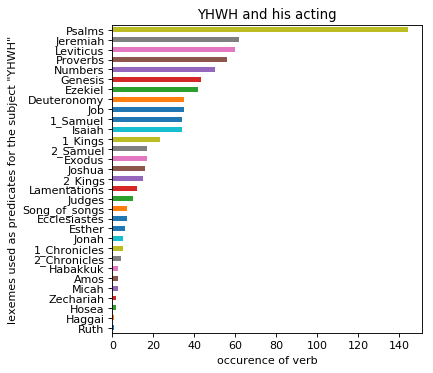

In [31]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
ValSoul1.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('occurence of verb')
plt.ylabel('lexemes used as predicates for the subject "YHWH"')
plt.title('YHWH and his acting')
plt.show()

In [32]:
ValSoul2 = '''
phrase function*
    word lex=NPC/    
'''
ValSoul2  = A.search(ValSoul2)
A.table(ValSoul2, start=1, end=5, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={3:'yellow', 5:'magenta', 6:'cyan'})

  0.67s 754 results


n,p,phrase,word
1,Genesis 1:20,שֶׁ֖רֶץ נֶ֣פֶשׁ חַיָּ֑ה,נֶ֣פֶשׁ
2,Genesis 1:21,אֶת־הַתַּנִּינִ֖ם הַגְּדֹלִ֑ים וְאֵ֣ת כָּל־נֶ֣פֶשׁ,נֶ֣פֶשׁ
3,Genesis 1:24,נֶ֤פֶשׁ חַיָּה֙,נֶ֤פֶשׁ
4,Genesis 1:30,נֶ֣פֶשׁ חַיָּ֔ה,נֶ֣פֶשׁ
5,Genesis 2:7,לְנֶ֥פֶשׁ חַיָּֽה׃,נֶ֥פֶשׁ


In [33]:
A.export(ValSoul2, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='ValSoul2.tsv')

In [34]:
ValSoul2=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/ValSoul2.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
ValSoul2.head(1)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,function1,NODE2,TYPE2,TEXT2,lex2
0,1,Genesis,1,20,651750,phrase,שֶׁ֖רֶץ נֶ֣פֶשׁ חַיָּ֑ה,Objc,367,word,נֶ֣פֶשׁ,NPC/


In [35]:
ValSoul2["function1"].value_counts()

Objc    262
Subj    233
Cmpl    110
Adju     68
PreC     35
Frnt     30
Voct     13
Modi      2
PrAd      1
Name: function1, dtype: int64

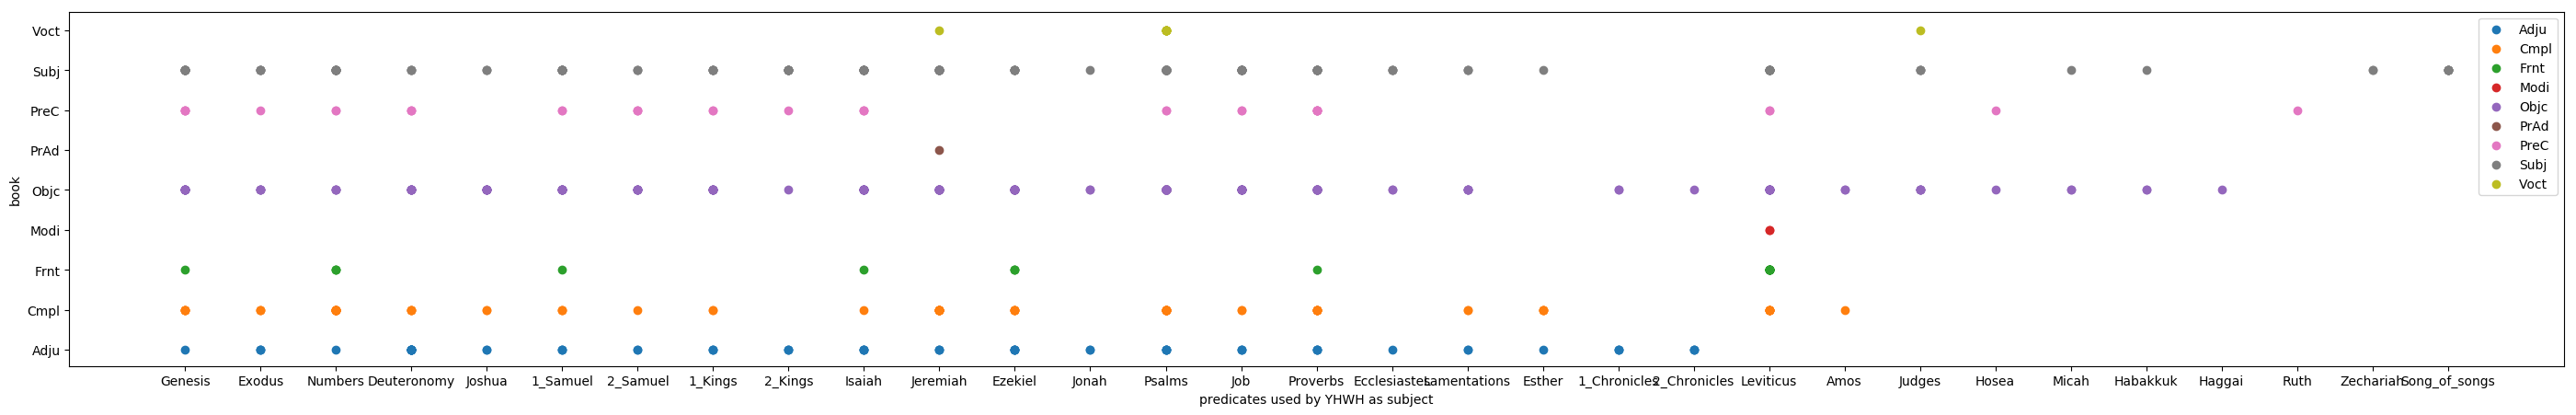

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(35, 5)

for S1, df in ValSoul2.groupby('function1'):
    ax.scatter(x="S1", y="function1", data=df, label=S1)

ax.set_xlabel("predicates used by YHWH as subject")
ax.set_ylabel("book")
ax.legend();

Text(0.5, 28.999999999999986, 'OT books')

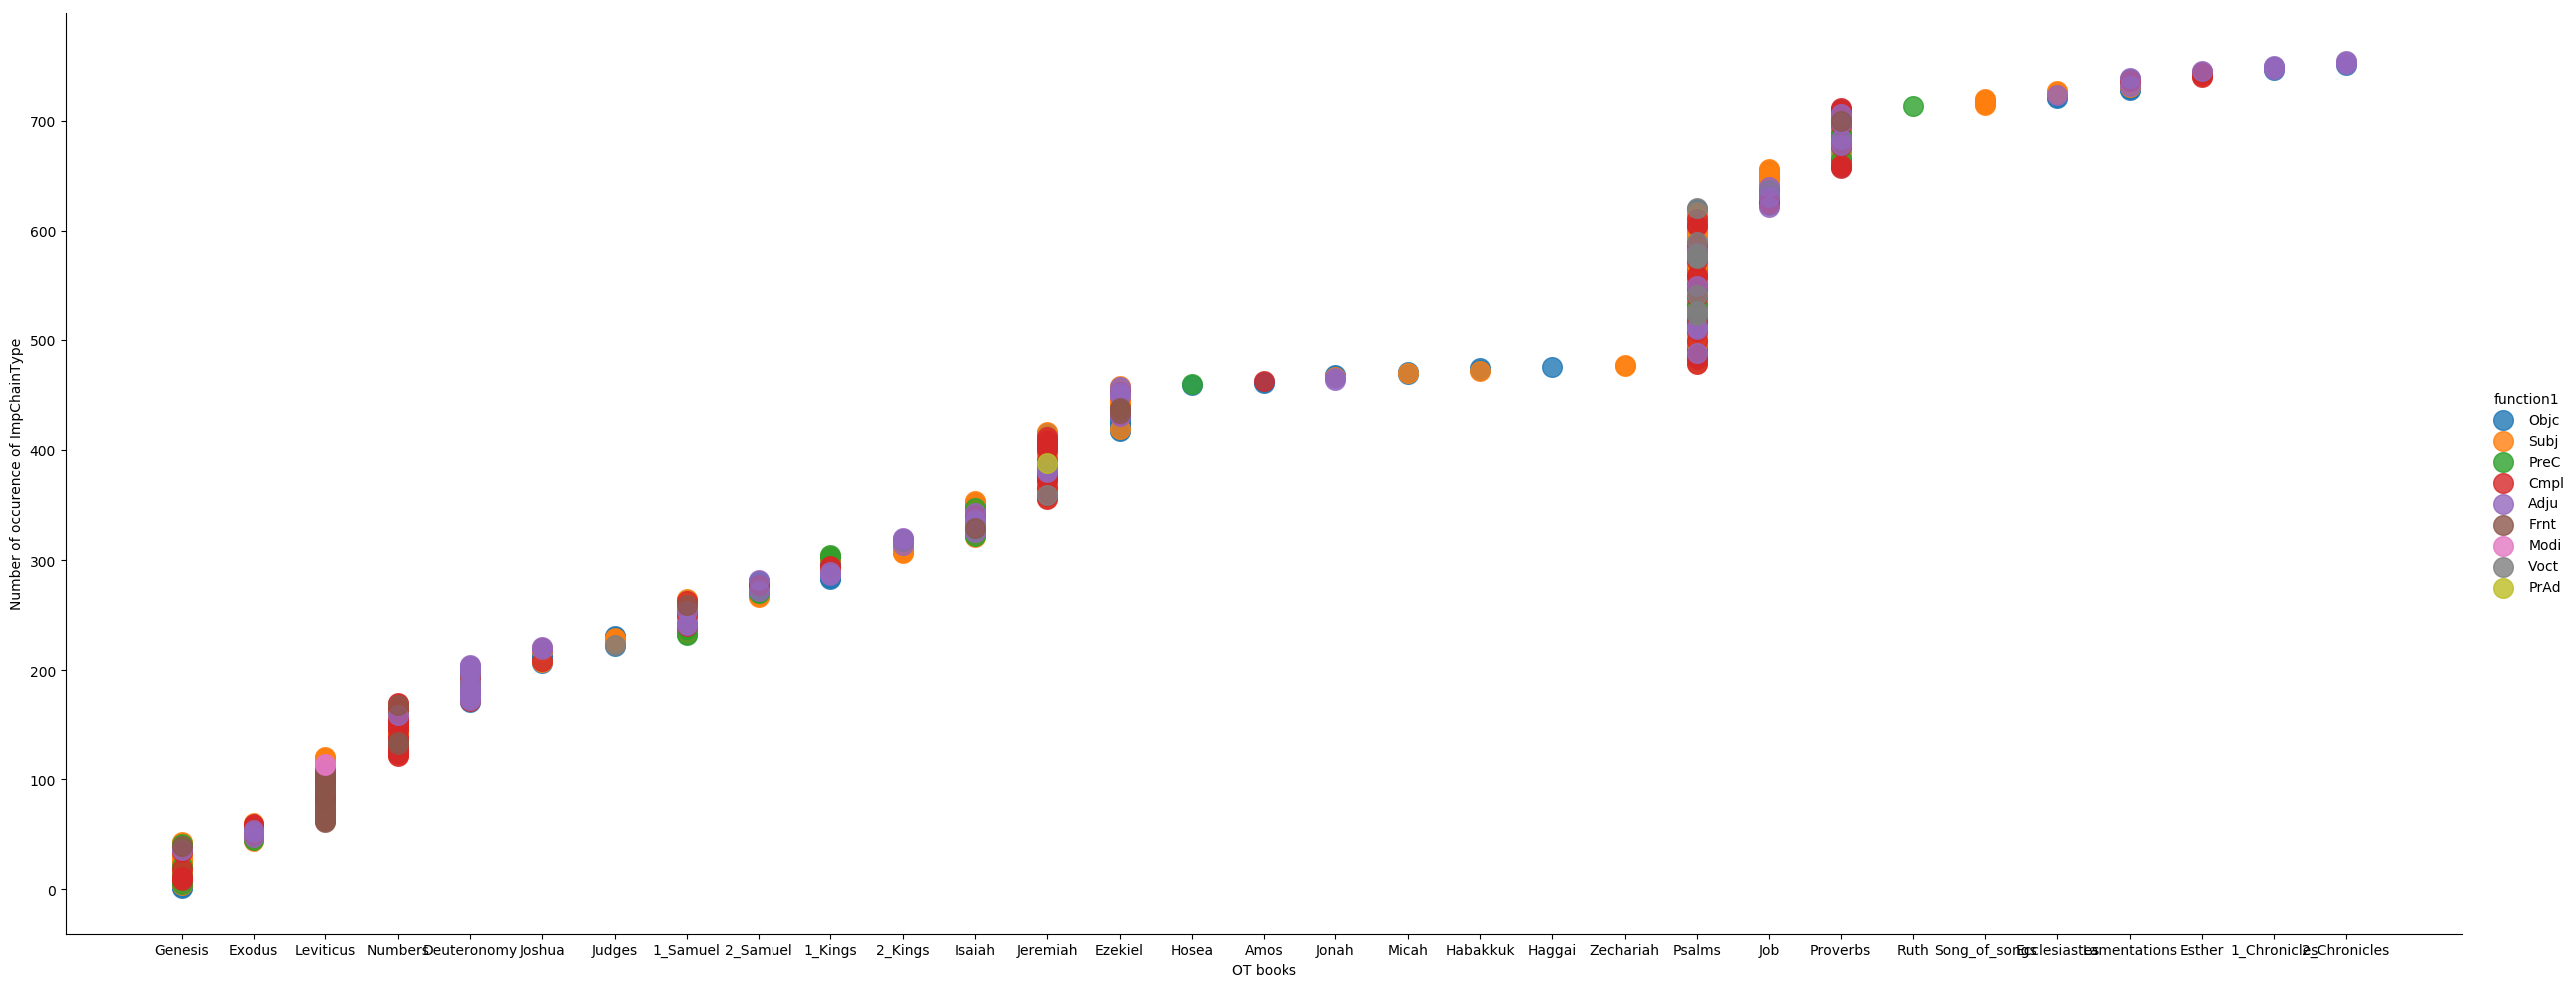

In [37]:
sns.lmplot(x="S1", y="R", data=ValSoul2, hue='function1', height=10, aspect=5/2, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

In [38]:
ValSoul3 = '''
book
    clause
        phrase function=Pred|PreC
            word lex*
        phrase function=Objc
            word lex=NPC/    
'''
ValSoul3  = A.search(ValSoul3)
A.table(ValSoul3, start=1, end=5, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={4:'yellow', 5:'magenta', 6:'cyan'})

  2.38s 264 results


n,p,book,clause,phrase,word,phrase,word
1,Genesis 1:20,,יִשְׁרְצ֣וּ הַמַּ֔יִם שֶׁ֖רֶץ נֶ֣פֶשׁ חַיָּ֑ה,יִשְׁרְצ֣וּ,יִשְׁרְצ֣וּ,שֶׁ֖רֶץ נֶ֣פֶשׁ חַיָּ֑ה,נֶ֣פֶשׁ
2,Genesis 1:21,,וַיִּבְרָ֣א אֱלֹהִ֔ים אֶת־הַתַּנִּינִ֖ם הַגְּדֹלִ֑ים וְאֵ֣ת כָּל־נֶ֣פֶשׁ לְמִֽינֵהֶ֗ם,יִּבְרָ֣א,יִּבְרָ֣א,אֶת־הַתַּנִּינִ֖ם הַגְּדֹלִ֑ים וְאֵ֣ת כָּל־נֶ֣פֶשׁ,נֶ֣פֶשׁ
3,Genesis 1:24,,תֹּוצֵ֨א הָאָ֜רֶץ נֶ֤פֶשׁ חַיָּה֙ לְמִינָ֔הּ,תֹּוצֵ֨א,תֹּוצֵ֨א,נֶ֤פֶשׁ חַיָּה֙,נֶ֤פֶשׁ
4,Genesis 2:19,,אֲשֶׁ֨ר יִקְרָא־לֹ֧ו הָֽאָדָ֛ם נֶ֥פֶשׁ חַיָּ֖ה,יִקְרָא־,יִקְרָא־,נֶ֥פֶשׁ חַיָּ֖ה,נֶ֥פֶשׁ
5,Genesis 9:4,,אַךְ־בָּשָׂ֕ר בְּנַפְשֹׁ֥ו דָמֹ֖ו לֹ֥א תֹאכֵֽלוּ׃,תֹאכֵֽלוּ׃,תֹאכֵֽלוּ׃,אַךְ־בָּשָׂ֕ר בְּנַפְשֹׁ֥ו דָמֹ֖ו,נַפְשֹׁ֥ו


In [39]:
A.export(ValSoul3, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='ValSoul3.tsv')

In [40]:
ValSoul3=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/ValSoul3.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
ValSoul3.head(1)

,R,S1,S2,S3,NODE1,TYPE1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,lex4,NODE5,TYPE5,TEXT5,function5,NODE6,TYPE6,TEXT6,lex6
0,1,Genesis,1,20,426585,book,427621,clause,יִשְׁרְצ֣וּ הַמַּ֔יִם שֶׁ֖רֶץ נֶ֣פֶשׁ חַיָּ֑ה,651748,phrase,יִשְׁרְצ֣וּ,Pred,363,word,יִשְׁרְצ֣וּ,CRY[,651750,phrase,שֶׁ֖רֶץ נֶ֣פֶשׁ חַיָּ֑ה,Objc,367,word,נֶ֣פֶשׁ,NPC/


In [41]:
ValSoul3["lex4"].value_counts()

BQC[     21
L        20
NYL[     16
MLV[     14
NF>[     10
CMR[      9
<NH=[     9
NTN[      8
CWB[      8
LQX[      8
PDH[      6
FJM[      6
JD<[      6
XJH[      6
NKH[      5
YWD[      5
FB<[      4
XRM[      4
C>L[      4
>BD[      3
JY>[      3
>KL[      3
ML>[      3
>SP[      3
ZNX[      2
RWH[      2
CPK[      2
<RH[      2
RDP[      2
R>H[      2
         ..
XLL[      1
>DB[      1
PLV[      1
MWT[      1
BRK[      1
CRY[      1
RJQ[      1
XRP[      1
QR>[      1
>RK[      1
<FH[      1
QWH[      1
GLH[      1
NG<[      1
QB<[      1
CLX[      1
ZKR[      1
M>S[      1
CLH[      1
XCQ[      1
VM>[      1
JGH[      1
XMS[      1
GML[      1
<LH[      1
XSR[      1
CXT[      1
QNH[      1
JC<[      1
HRG[      1
Name: lex4, Length: 92, dtype: int64

Gen 2:19 is instructive since it uses the typical constructions for giving names to persons. Thus, Adam's first name is not Adam but Nephesh Xaja.

In [42]:
ValSoul4 = '''
book
    clause
        phrase function=Pred|PreC
            word lex*
        phrase function=Subj
            word lex=NPC/    
'''
ValSoul4  = A.search(ValSoul4)
A.table(ValSoul4, start=1, end=5, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={4:'yellow', 5:'magenta', 6:'cyan'})

  2.72s 281 results


n,p,book,clause,phrase,word,phrase,word
1,Genesis 1:30,,אֲשֶׁר־בֹּו֙ נֶ֣פֶשׁ חַיָּ֔ה,בֹּו֙,בֹּו֙,נֶ֣פֶשׁ חַיָּ֔ה,נֶ֣פֶשׁ
2,Genesis 12:13,,וְחָיְתָ֥ה נַפְשִׁ֖י בִּגְלָלֵֽךְ׃,חָיְתָ֥ה,חָיְתָ֥ה,נַפְשִׁ֖י,נַפְשִׁ֖י
3,Genesis 17:14,,וְנִכְרְתָ֛ה הַנֶּ֥פֶשׁ הַהִ֖וא מֵעַמֶּ֑יהָ,נִכְרְתָ֛ה,נִכְרְתָ֛ה,הַנֶּ֥פֶשׁ הַהִ֖וא,נֶּ֥פֶשׁ
4,Genesis 19:20,,וּתְחִ֥י נַפְשִֽׁי׃,תְחִ֥י,תְחִ֥י,נַפְשִֽׁי׃,נַפְשִֽׁי׃
5,Genesis 32:31,,וַתִּנָּצֵ֖ל נַפְשִֽׁי׃,תִּנָּצֵ֖ל,תִּנָּצֵ֖ל,נַפְשִֽׁי׃,נַפְשִֽׁי׃


In [43]:
A.export(ValSoul4, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='ValSoul4.tsv')

In [44]:
ValSoul4=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/ValSoul4.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
ValSoul4.head(1)

,R,S1,S2,S3,NODE1,TYPE1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,lex4,NODE5,TYPE5,TEXT5,function5,NODE6,TYPE6,TEXT6,lex6
0,1,Genesis,1,30,426585,book,427671,clause,אֲשֶׁר־בֹּו֙ נֶ֣פֶשׁ חַיָּ֔ה,651893,phrase,בֹּו֙,PreC,642,word,בֹּו֙,B,651894,phrase,נֶ֣פֶשׁ חַיָּ֔ה,Subj,643,word,נֶ֣פֶשׁ,NPC/


In [45]:
ValSoul4["lex4"].value_counts()

KRT[     16
XJ/       9
B         9
>WH[      9
XJH[      8
HJH[      8
L         8
NPC/      6
W         6
JQR[      5
>HB[      5
G<L[      5
NQ<[      5
CC/       5
FB<[      5
TXT/      5
>LP=/     4
H         4
CB</      4
QYR[      4
<FR/      3
NQM[      3
DBQ[      3
KLH[      3
CLC/      3
CLL/      3
MWT[      3
K         3
NWS[      2
CKN[      2
         ..
CWQQ/     1
XKM/      1
GRS[      1
MWG[      1
T<B[      1
<JP[      1
<GM[      1
VWB/      1
TWK/      1
ZH        1
XCQ[      1
LJN[      1
<JP/      1
NYL[      1
BHL[      1
<M/       1
CW<[      1
JHWH/     1
XPY[      1
XSH[      1
QBY[      1
YWQ[      1
ML>[      1
QWY[      1
>KL[      1
NF>[      1
>JN/      1
BKH[      1
KPP[      1
>CM[      1
Name: lex4, Length: 133, dtype: int64

In [46]:
ValSoul5 = '''
book
    clause
        phrase function=Pred|PreC
            word lex*
        phrase function=Cmpl
            word lex=NPC/    
'''
ValSoul5  = A.search(ValSoul5)
A.table(ValSoul5, start=1, end=5, condensed=False, extraFeatures='qere_utf8', fmt='text-orig-full-ketiv', colorMap={4:'yellow', 5:'magenta', 6:'cyan'})

  2.10s 109 results


n,p,book,clause,phrase,word,phrase,word
1,Genesis 9:5,,וְאַ֨ךְ אֶת־דִּמְכֶ֤ם לְנַפְשֹֽׁתֵיכֶם֙ אֶדְרֹ֔שׁ,אֶדְרֹ֔שׁ,אֶדְרֹ֔שׁ,לְנַפְשֹֽׁתֵיכֶם֙,נַפְשֹֽׁתֵיכֶם֙
2,Genesis 9:12,,אֲשֶׁר־אֲנִ֣י נֹתֵ֗ן בֵּינִי֙ וּבֵ֣ינֵיכֶ֔ם וּבֵ֛ין כָּל־נֶ֥פֶשׁ חַיָּ֖ה,נֹתֵ֗ן,נֹתֵ֗ן,בֵּינִי֙ וּבֵ֣ינֵיכֶ֔ם וּבֵ֛ין כָּל־נֶ֥פֶשׁ חַיָּ֖ה,נֶ֥פֶשׁ
3,Genesis 19:17,,הִמָּלֵ֣ט עַל־נַפְשֶׁ֔ךָ,הִמָּלֵ֣ט,הִמָּלֵ֣ט,עַל־נַפְשֶׁ֔ךָ,נַפְשֶׁ֔ךָ
4,Genesis 44:30,,וְנַפְשֹׁ֖ו קְשׁוּרָ֥ה בְנַפְשֹֽׁו׃,קְשׁוּרָ֥ה,קְשׁוּרָ֥ה,בְנַפְשֹֽׁו׃,נַפְשֹֽׁו׃
5,Exodus 12:16,,אַ֚ךְ אֲשֶׁ֣ר יֵאָכֵ֣ל לְכָל־נֶ֔פֶשׁ,יֵאָכֵ֣ל,יֵאָכֵ֣ל,לְכָל־נֶ֔פֶשׁ,נֶ֔פֶשׁ


In [47]:
A.export(ValSoul5, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='ValSoul5.tsv')

In [48]:
ValSoul5=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/ValSoul5.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
ValSoul5.head(1)

,R,S1,S2,S3,NODE1,TYPE1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,lex4,NODE5,TYPE5,TEXT5,function5,NODE6,TYPE6,TEXT6,lex6
0,1,Genesis,9,5,426585,book,428274,clause,וְאַ֨ךְ אֶת־דִּמְכֶ֤ם לְנַפְשֹֽׁתֵיכֶם֙ אֶדְרֹ...,653797,phrase,אֶדְרֹ֔שׁ,Pred,4115,word,אֶדְרֹ֔שׁ,DRC[,653796,phrase,לְנַפְשֹֽׁתֵיכֶם֙,Cmpl,4114,word,נַפְשֹֽׁתֵיכֶם֙,NPC/


In [49]:
ValSoul5["lex4"].value_counts()

NTN[       11
L          11
>SR[       10
KPR[        6
NG<[        4
>MR[        4
VM>/        4
<FH[        3
CMR[        3
BW>[        3
HJH[        3
<MD[        2
FJM[        2
CB<[        2
QCR[        2
LQX[        2
<BR[        2
DBR[        1
T<H[        1
QRB[        1
NQC[        1
HLK[        1
<NH[        1
KRH[        1
YPN[        1
CJT[        1
XJJM/       1
FJX[        1
DRC[        1
JC<[        1
C>P[        1
BQC[        1
GDD[        1
MLV[        1
<LL[        1
>RB[        1
VM>[        1
<CQ[        1
>KL[        1
JR>[        1
SBB[        1
C>L[        1
NZH[        1
CLX[        1
<RB===[     1
ZBX[        1
XTT[        1
HLL[        1
DMH[        1
XV>[        1
MY>[        1
N<M[        1
Name: lex4, dtype: int64